<a href="https://colab.research.google.com/github/lmrhody/femethodsS23/blob/main/Week14notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic models with Gensim

Gensim is a popular library for topic modeling. Here we'll see how it stacks up to scikit-learn.

### Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.
* **recipes.csv:** recipes - a list of recipes (but only with ingredient names)
* **state-of-the-union.csv:** State of the Union addresses - each presidential address from 1970 to 2012


## Gensim vs. Scikit-learn

[Gensim](https://radimrehurek.com/gensim/) is a very very popular piece of software to do topic modeling with (as is [Mallet](http://mallet.cs.umass.edu/topics.php), if you're making a list). Since we're using scikit-learn for everything else, though, we use scikit-learn instead of Gensim when we get to topic modeling.

Since someone might show up one day offering us tens of thousands of dollars to demonstrate proficiency in Gensim, though, we might as well see how it works as compared to scikit-learn.

## Our data

We'll be using the same dataset as we did [with scikit-learn](/text-analysis/introduction-to-topic-modeling/#Attempt-two:-State-of-the-Union-addresses): State of the Union addresses from 1790 to 2012, where America's president addresses the Congress about the coming year.

In [1]:
import pandas as pd

df = pd.read_csv("data/state-of-the-union.csv")

# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
df.content = df.content.str.replace("[^A-Za-z ]", " ")

df.head()

,year,content
0,1790,"George Washington\nJanuary 8, 1790\n\nFellow-C..."
1,1790,\nState of the Union Address\nGeorge Washingto...
2,1791,\nState of the Union Address\nGeorge Washingto...
3,1792,\nState of the Union Address\nGeorge Washingto...
4,1793,\nState of the Union Address\nGeorge Washingto...


## Using Gensim

In [2]:
from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [3]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in texts]

In [4]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [5]:
n_topics = 15

# Build an LSI model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [6]:
lsi_model.print_topics()

[(0,
  '0.084*"tonight" + 0.073*"program" + 0.066*"ve" + 0.065*"help" + 0.065*"budget" + 0.065*"mexico" + 0.065*"americans" + 0.061*"programs" + 0.059*"jobs" + 0.058*"re"'),
 (1,
  '-0.206*"tonight" + -0.169*"ve" + -0.137*"re" + -0.136*"jobs" + -0.130*"americans" + -0.123*"budget" + -0.123*"help" + -0.116*"programs" + -0.112*"program" + -0.106*"billion"'),
 (2,
  '0.199*"tonight" + 0.177*"ve" + 0.164*"re" + -0.137*"program" + 0.094*"jobs" + 0.092*"ll" + -0.092*"farm" + 0.091*"iraq" + -0.087*"veterans" + -0.081*"interstate"'),
 (3,
  '-0.141*"program" + 0.120*"silver" + 0.113*"re" + 0.110*"cent" + -0.106*"communist" + 0.105*"ve" + 0.099*"tonight" + -0.098*"soviet" + -0.095*"programs" + 0.090*"gold"'),
 (4,
  '-0.199*"iraq" + -0.171*"terrorists" + 0.143*"silver" + 0.132*"gold" + -0.126*"interstate" + -0.118*"iraqi" + 0.110*"programs" + -0.110*"al" + 0.099*"soviet" + 0.098*"notes"'),
 (5,
  '-0.273*"iraq" + -0.237*"terrorists" + 0.185*"re" + 0.185*"ve" + -0.169*"iraqi" + -0.152*"al" + -0.

Gensim is all about how important each word is to the category. Why not visualize it? First we'll make a dataframe that shows each topic, its top five words, and its values.

In [7]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.083991,tonight,0
1,0.073469,program,0
2,0.065707,ve,0
3,0.065220,help,0
4,0.065026,budget,0


Then we'll use seaborn to visualize it.

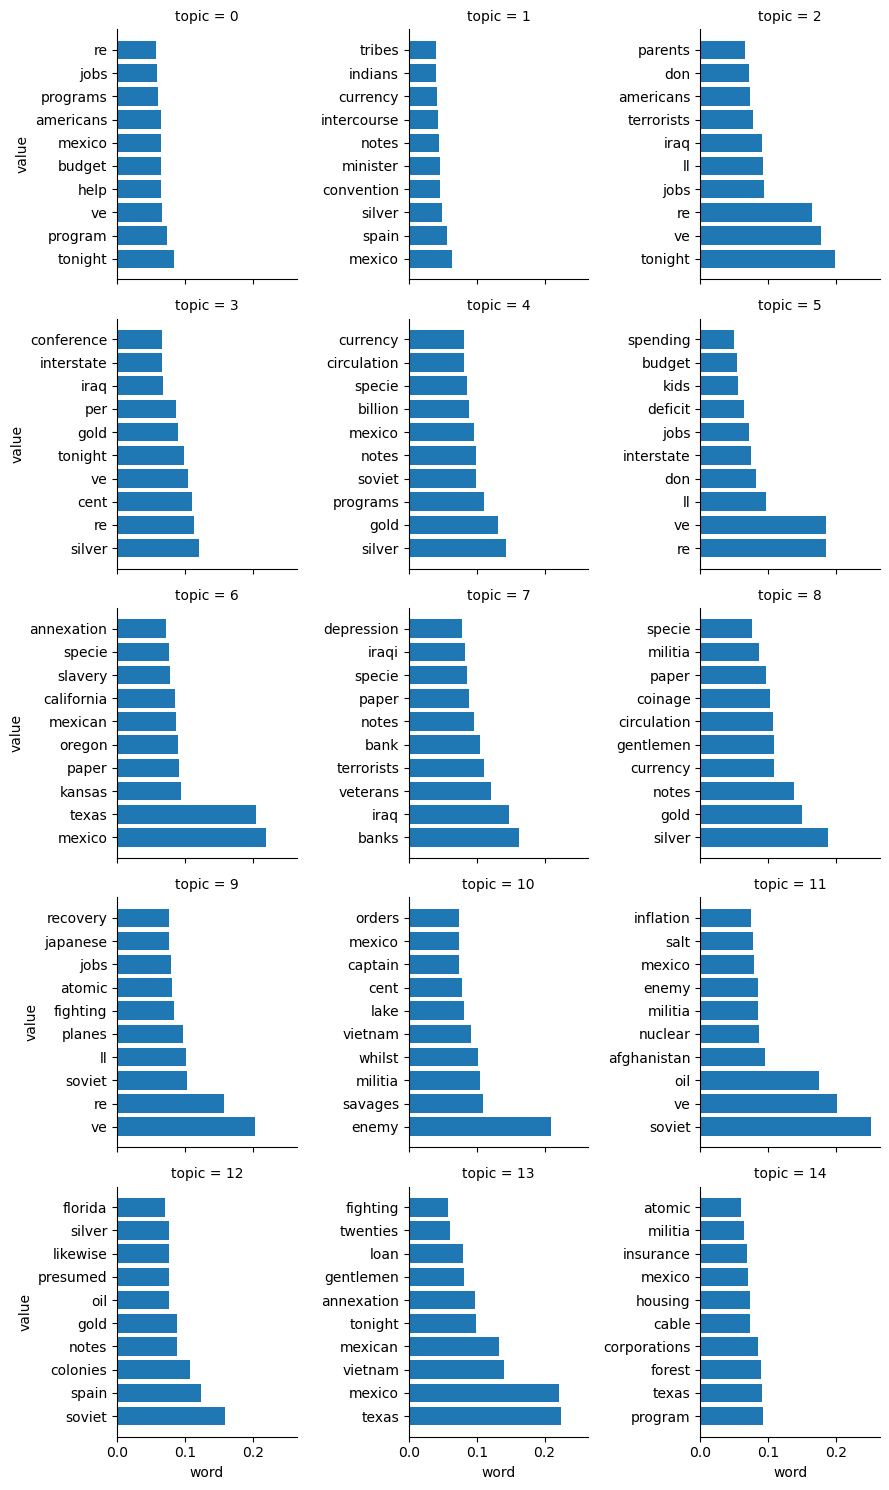

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

## Using LDA with Gensim

Now we'll use LDA.

In [9]:
from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [10]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]

In [11]:
from gensim import models

n_topics = 15

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [12]:
lda_model.print_topics()

[(0,
  '0.004*"1986" + 0.004*"1559" + 0.003*"1974" + 0.003*"1260" + 0.003*"1971" + 0.003*"951" + 0.003*"1930" + 0.003*"1242" + 0.003*"1989" + 0.002*"1626"'),
 (1,
  '0.004*"1986" + 0.004*"1559" + 0.003*"1930" + 0.003*"1260" + 0.002*"1626" + 0.002*"1242" + 0.002*"1017" + 0.002*"1989" + 0.002*"1481" + 0.002*"1974"'),
 (2,
  '0.003*"1971" + 0.003*"1986" + 0.003*"1626" + 0.003*"1989" + 0.003*"1865" + 0.002*"1930" + 0.002*"151" + 0.002*"1260" + 0.002*"1922" + 0.002*"1545"'),
 (3,
  '0.004*"1559" + 0.003*"151" + 0.003*"62" + 0.002*"976" + 0.002*"1930" + 0.002*"1626" + 0.002*"1986" + 0.002*"19" + 0.002*"981" + 0.002*"214"'),
 (4,
  '0.004*"1930" + 0.004*"1626" + 0.004*"1260" + 0.003*"1559" + 0.003*"1242" + 0.003*"1986" + 0.002*"1971" + 0.002*"1784" + 0.002*"1327" + 0.002*"1999"'),
 (5,
  '0.003*"1930" + 0.003*"1559" + 0.003*"1986" + 0.002*"151" + 0.002*"1327" + 0.002*"1446" + 0.002*"266" + 0.002*"1896" + 0.002*"57" + 0.002*"1260"'),
 (6,
  '0.004*"1260" + 0.004*"1930" + 0.003*"1559" + 0.003*"

In [15]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.010910 -0.002791       1        1  17.134808
12     0.009011  0.001082       2        1  14.173632
8     -0.010247 -0.002634       3        1  13.096900
3      0.007454  0.002799       4        1  13.054997
9     -0.009834  0.003487       5        1  11.539832
7      0.007693 -0.000649       6        1  10.223956
14    -0.007133 -0.001068       7        1   5.967926
5      0.003100  0.000175       8        1   3.172534
1     -0.001817  0.000799       9        1   2.974092
6     -0.005376 -0.001599      10        1   2.085404
4     -0.000041 -0.002554      11        1   1.843316
13     0.002647  0.001484      12        1   1.558495
10    -0.000789 -0.001109      13        1   1.522795
2     -0.002646 -0.001844      14        1   1.167652
0     -0.002932  0.004423      15        1   0.483662, topic_info=           Term        Freq       Total Category  logprob  loglift
1986    program  657.000000  657.000000  Default  30.0000  30.0000
1559     mexico  839.000000  839.000000  Default  29.0000  29.0000
1260  americans  695.000000  695.000000  Default  28.0000  28.0000
1930       help  730.000000  730.000000  Default  27.0000  27.0000
1971     budget  551.000000  551.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
214     payment    2.135254  404.479221  Topic15  -6.3829   0.0875
468        july    2.068754  373.805177  Topic15  -6.4145   0.1348
440       court    2.257294  508.744947  Topic15  -6.3273  -0.0862
976       spain    2.225987  520.283523  Topic15  -6.3412  -0.1226
1995       jobs    2.033518  406.604565  Topic15  -6.4317   0.0335

[1048 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
810       1  0.138810  abandoned
810       2  0.138810  abandoned
810       3  0.113572  abandoned
810       4  0.176667  abandoned
810       5  0.113572  abandoned
...     ...       ...        ...
1796     11  0.016244      young
1796     12  0.010829      young
1796     13  0.021659      young
1796     14  0.010829      young
1796     15  0.005415      young

[7773 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 13, 9, 4, 10, 8, 15, 6, 2, 7, 5, 14, 11, 3, 1])